## Life cycle of machine learning project

1.Understanding the problem statement.

2.Data collection.

3.EDA(Exploratory Data Analysis).

4.Data cleaning.

5.Data preprocessing.

6.Model Training.

7.Choose best model

## 1.Problem statement

This dataset contains information of Seven different types of dry beans were used in this project, taking into account the features 
such as form, shape, type, and structure by the market situation. Use best machine learning 
algorithm to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay, 
Cali, Dermason, Horoz, Seker and Sira, depending only on dimension and shape features of 
bean varieties with no external discriminatory features

Features Information:
1. Area (A): The area of a bean zone and the number of pixels within its boundaries.

2. Perimeter (P): Bean circumference is defined as the length of its border.

3. Major axis length (L): The distance between the ends of the longest line that can be 
drawn from a bean.

4. Minor axis length (l): The longest line that can be drawn from the bean while 
standing perpendicular to the main axis.

5. Aspect ratio (K): Defines the relationship between L and l.

6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7. Convex area (C): Number of pixels in the smallest convex polygon that can contain 
the area of a bean seed.

8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean 
seed area.

9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to 
those found in beans.

11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12. Compactness (CO): Measures the roundness of an object: Ed/L

13. ShapeFactor1 (SF1)

14. ShapeFactor2 (SF2)

15. ShapeFactor3 (SF3)

16. ShapeFactor4 (SF4)

17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

## 2.Data Collection

## 2.1) importing the data and libraries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## importing csv file in dataframe

In [2]:
df= pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/Beans Prediction(mini project 2).csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## 3. EDA(Exploratory Data Analysis)

Features Information:
1. Area (A): The area of a bean zone and the number of pixels within its boundaries.

2. Perimeter (P): Bean circumference is defined as the length of its border.

3. Major axis length (L): The distance between the ends of the longest line that can be 
drawn from a bean.

4. Minor axis length (l): The longest line that can be drawn from the bean while 
standing perpendicular to the main axis.

5. Aspect ratio (K): Defines the relationship between L and l.

6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7. Convex area (C): Number of pixels in the smallest convex polygon that can contain 
the area of a bean seed.

8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean 
seed area.

9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to 
those found in beans.

11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12. Compactness (CO): Measures the roundness of an object: Ed/L

13. ShapeFactor1 (SF1)

14. ShapeFactor2 (SF2)

15. ShapeFactor3 (SF3)

16. ShapeFactor4 (SF4)

17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [3]:
df.size

231387

## Unique values in each features

In [4]:

df.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64

## shape of data 

In [5]:
df.shape

(13611, 17)

## info of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

## Statistical description of data

In [7]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## checking null values

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### The dataset doesnot contain any null values

## Variable type

Numeric: All the columns have continous type data except target 

Categorical: there's only one column which is Target(Class)

## checking for duplicates

In [9]:
df.duplicated().sum()

68

## dropping duplicates ,these wont be of any use

In [10]:
df1= df.drop_duplicates()
df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## checking data disribution

In [11]:
fea=df1.drop(columns='Class') # no target only features

<Figure size 640x480 with 0 Axes>

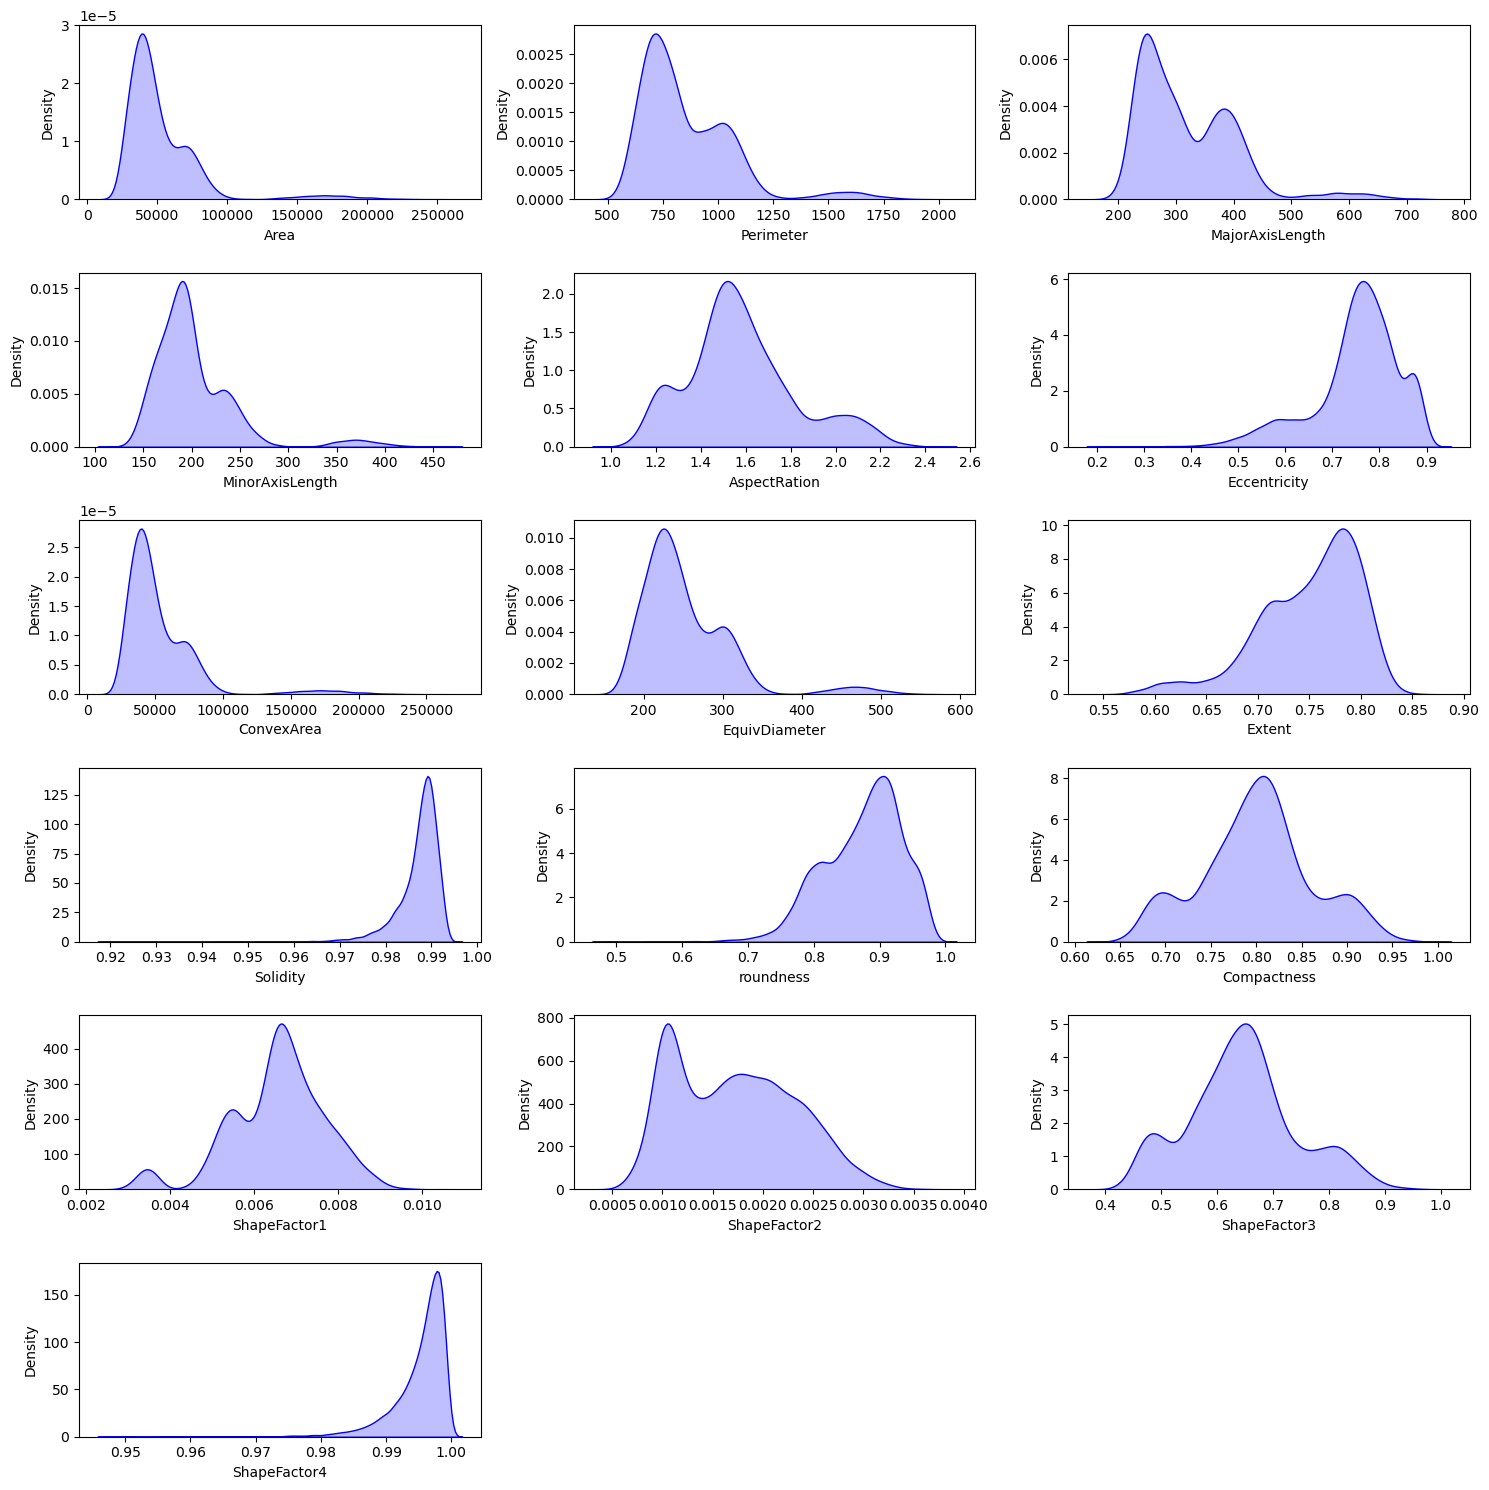

In [12]:
 plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y='Density')
plt.figure (figsize=(15,15))
 for i in range(0, len (fea.columns) ): 
        plt.subplot (6, 3, i+1) 
        sns.kdeplot (x=fea.iloc[ : ,i], shade=True, color="b")
        plt.xlabel (fea. columns [i]) 
plt.tight_layout ()  



## Observations

All the data are skewed and show bit of normal distribution 

we can see outliars in most of the important features 

## Checking Target

In [13]:
df1.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

## Observation

Target show high imbalance

BOMBAY has very less data compared to DERMASON we have to look into it while model buliding

<AxesSubplot:>

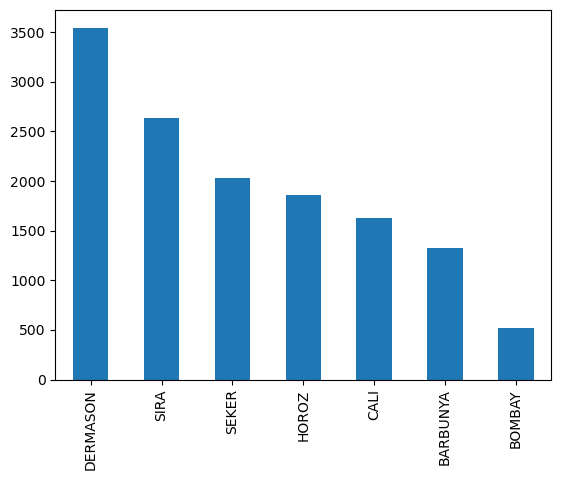

In [14]:
df1.Class.value_counts().plot(kind='bar')# there is no normal distribution(imbalance)

From above figure we can see how imbalance is there

Text(0.5, 1.0, 'Area vs Perimeter')

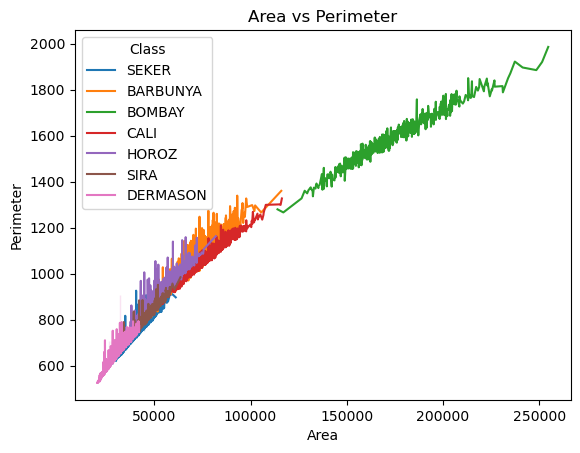

In [15]:
sns.lineplot (x= 'Area' ,y="Perimeter", data=df1, hue="Class") 
plt.title("Area vs Perimeter") 

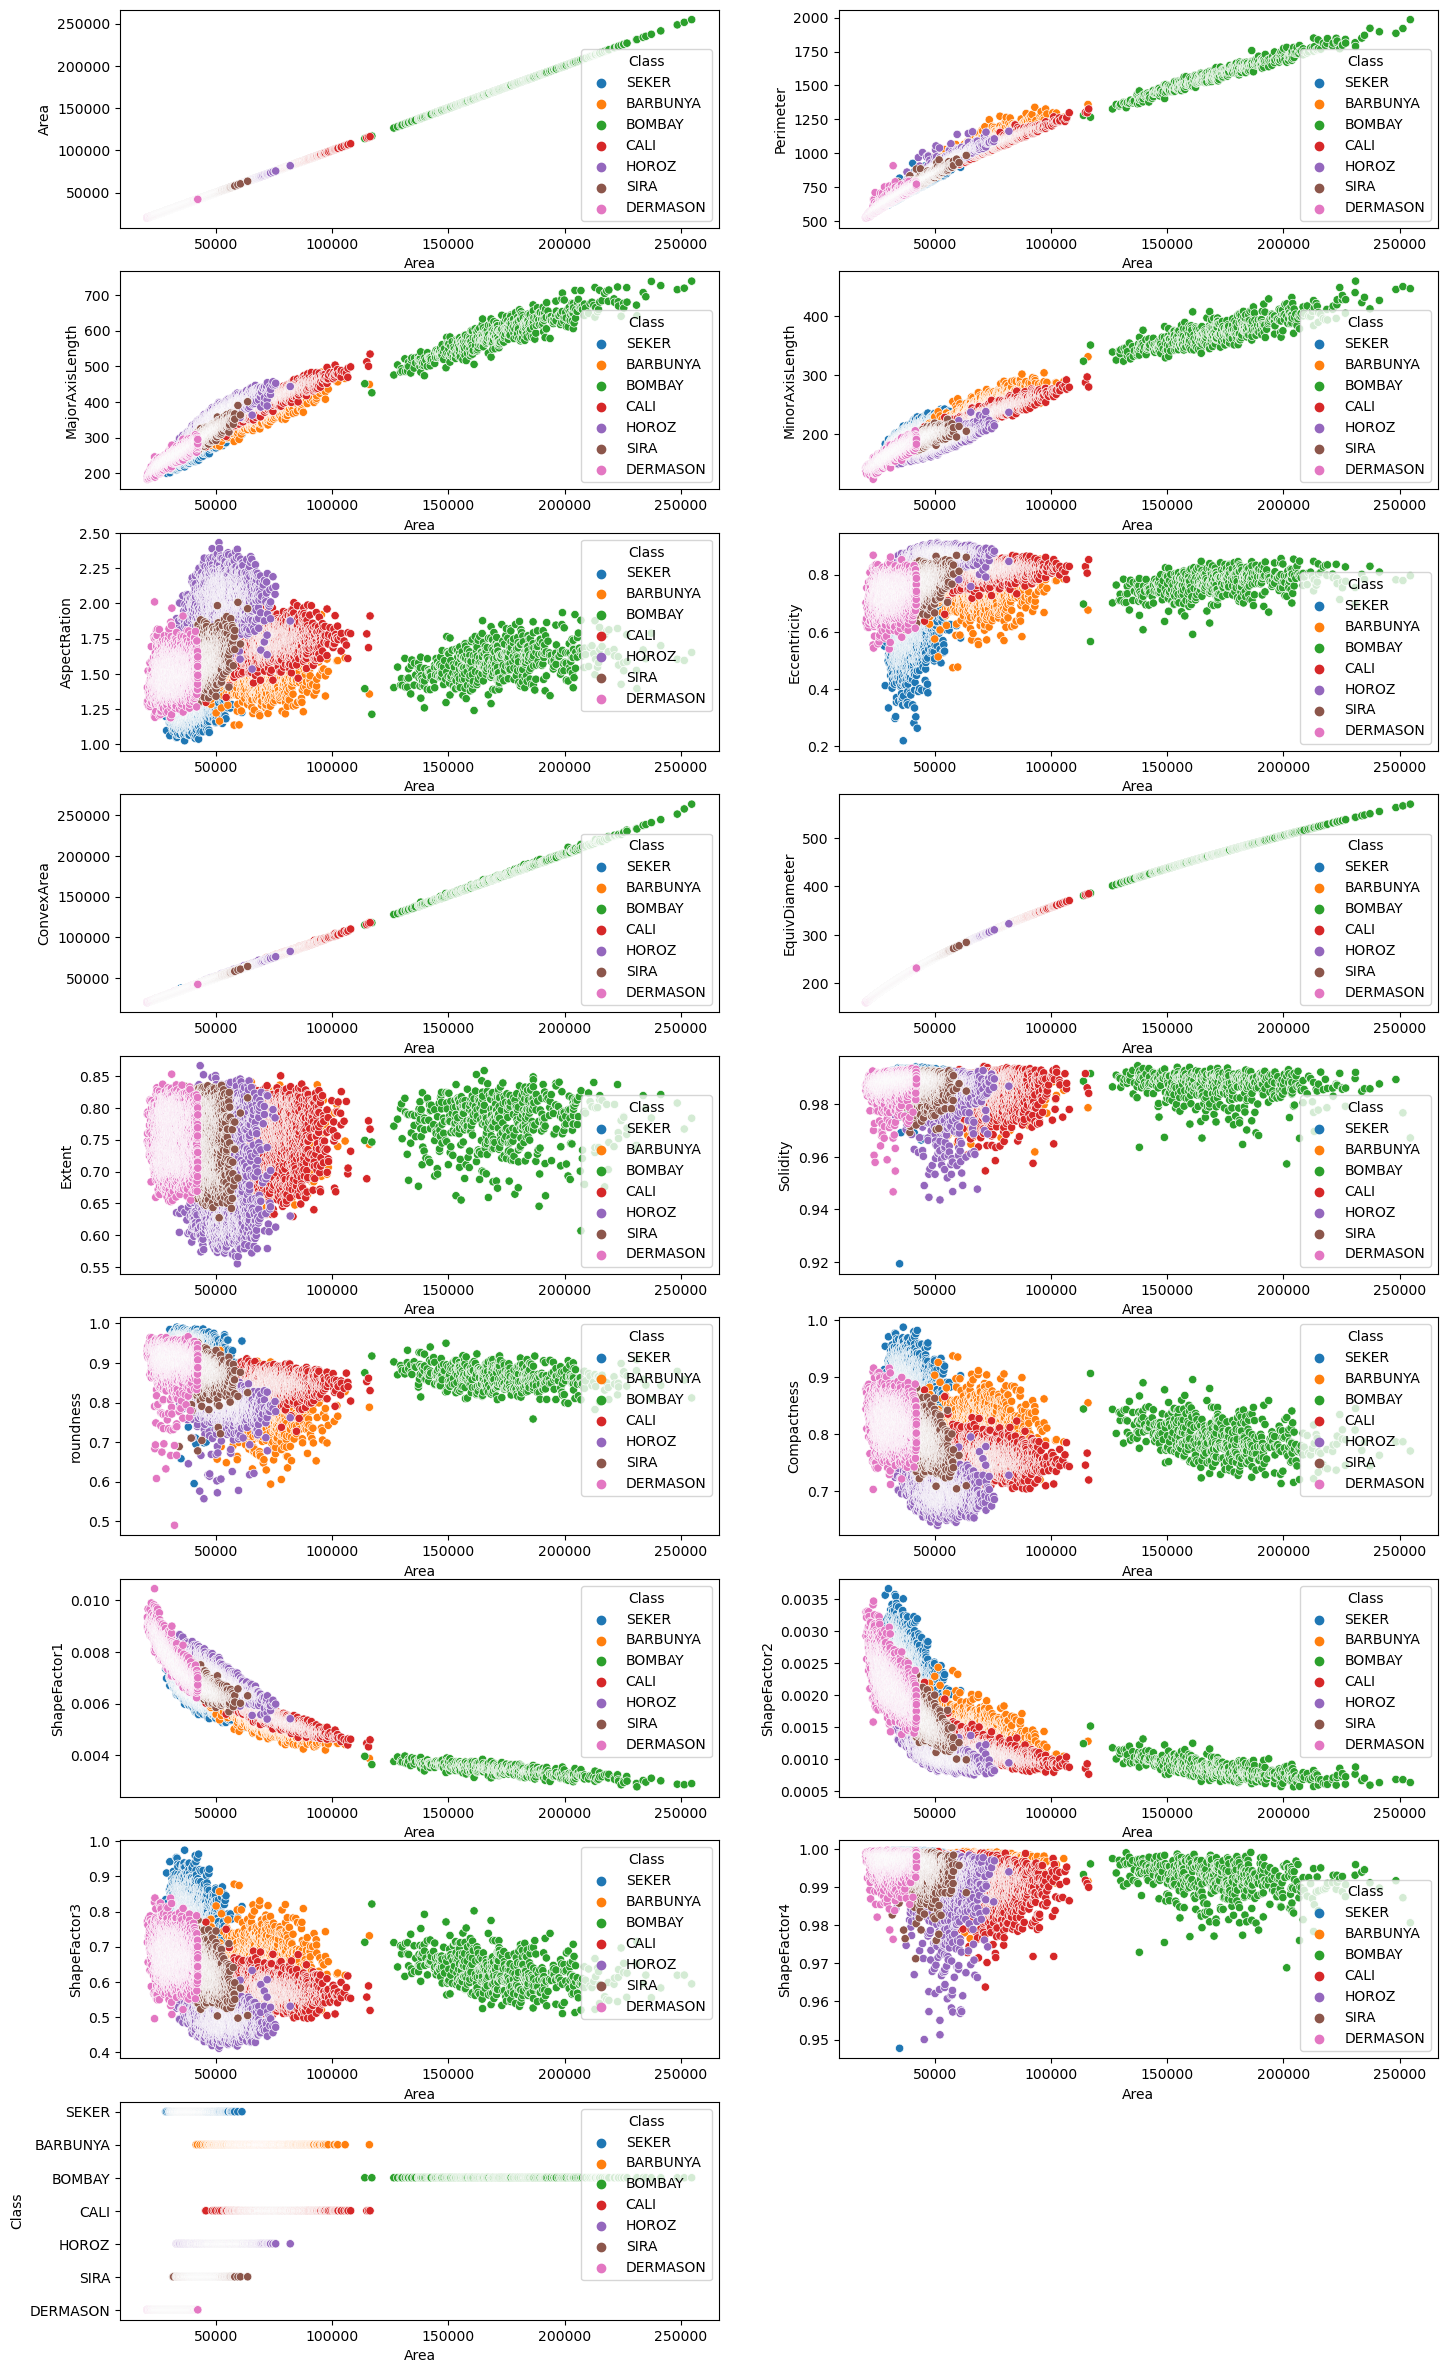

In [16]:
 plt.figure(figsize=(17, 30)) 

for i in range(0, len (df1.columns) ): 
    plt.subplot (9, 2,i+1)
    sns.scatterplot(data=df1, x="Area", y=df1. iloc [: , i], color="b" , hue="Class")
    plt.xlabel('Area')

## observations

We can observe from above Bombay bean has the biggest area in size,followed by BARBUNYA & CALI 


From Shapefactor(1,2,3,4) we can see Bombay has the dominance in size 
EquiDiameter is in following range in decreasing order below 
1. BOMBAY 
2. CALI 
3. BARBUNYA 
4. HORZ0 
5. SIRA 
6. SEKER 
7. DERMASON 
Bombay has the highest minor and major length

we can see linearity between AREA & EQUIDIAMETER same with CONVEXAREA

<AxesSubplot:xlabel='Area', ylabel='AspectRation'>

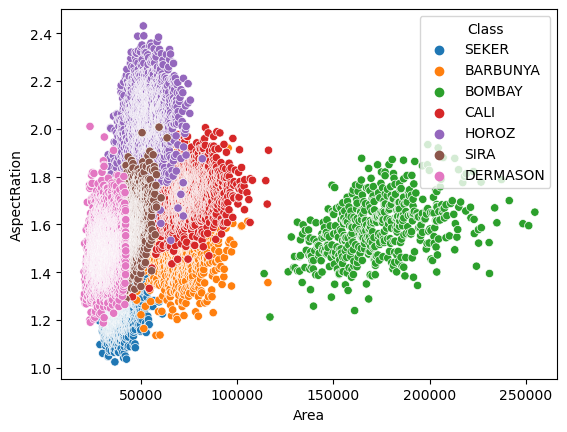

In [17]:
sns.scatterplot (x="Area",y="AspectRation", data=df1, hue="Class") 

Text(0.5, 1.0, 'Area vs Compactness')

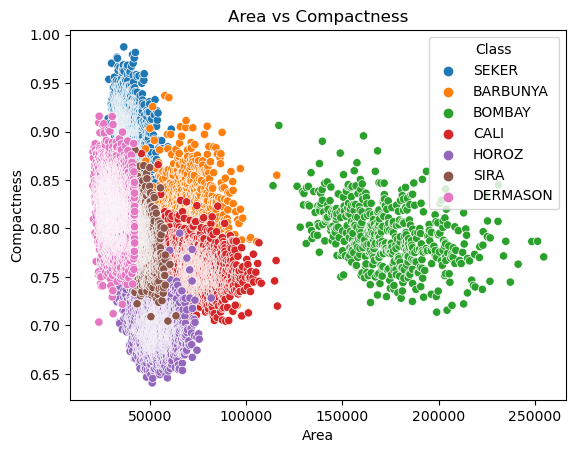

In [18]:
sns.scatterplot (x="Area",y="Compactness", data=df1, hue="Class") 
plt.title("Area vs Compactness")

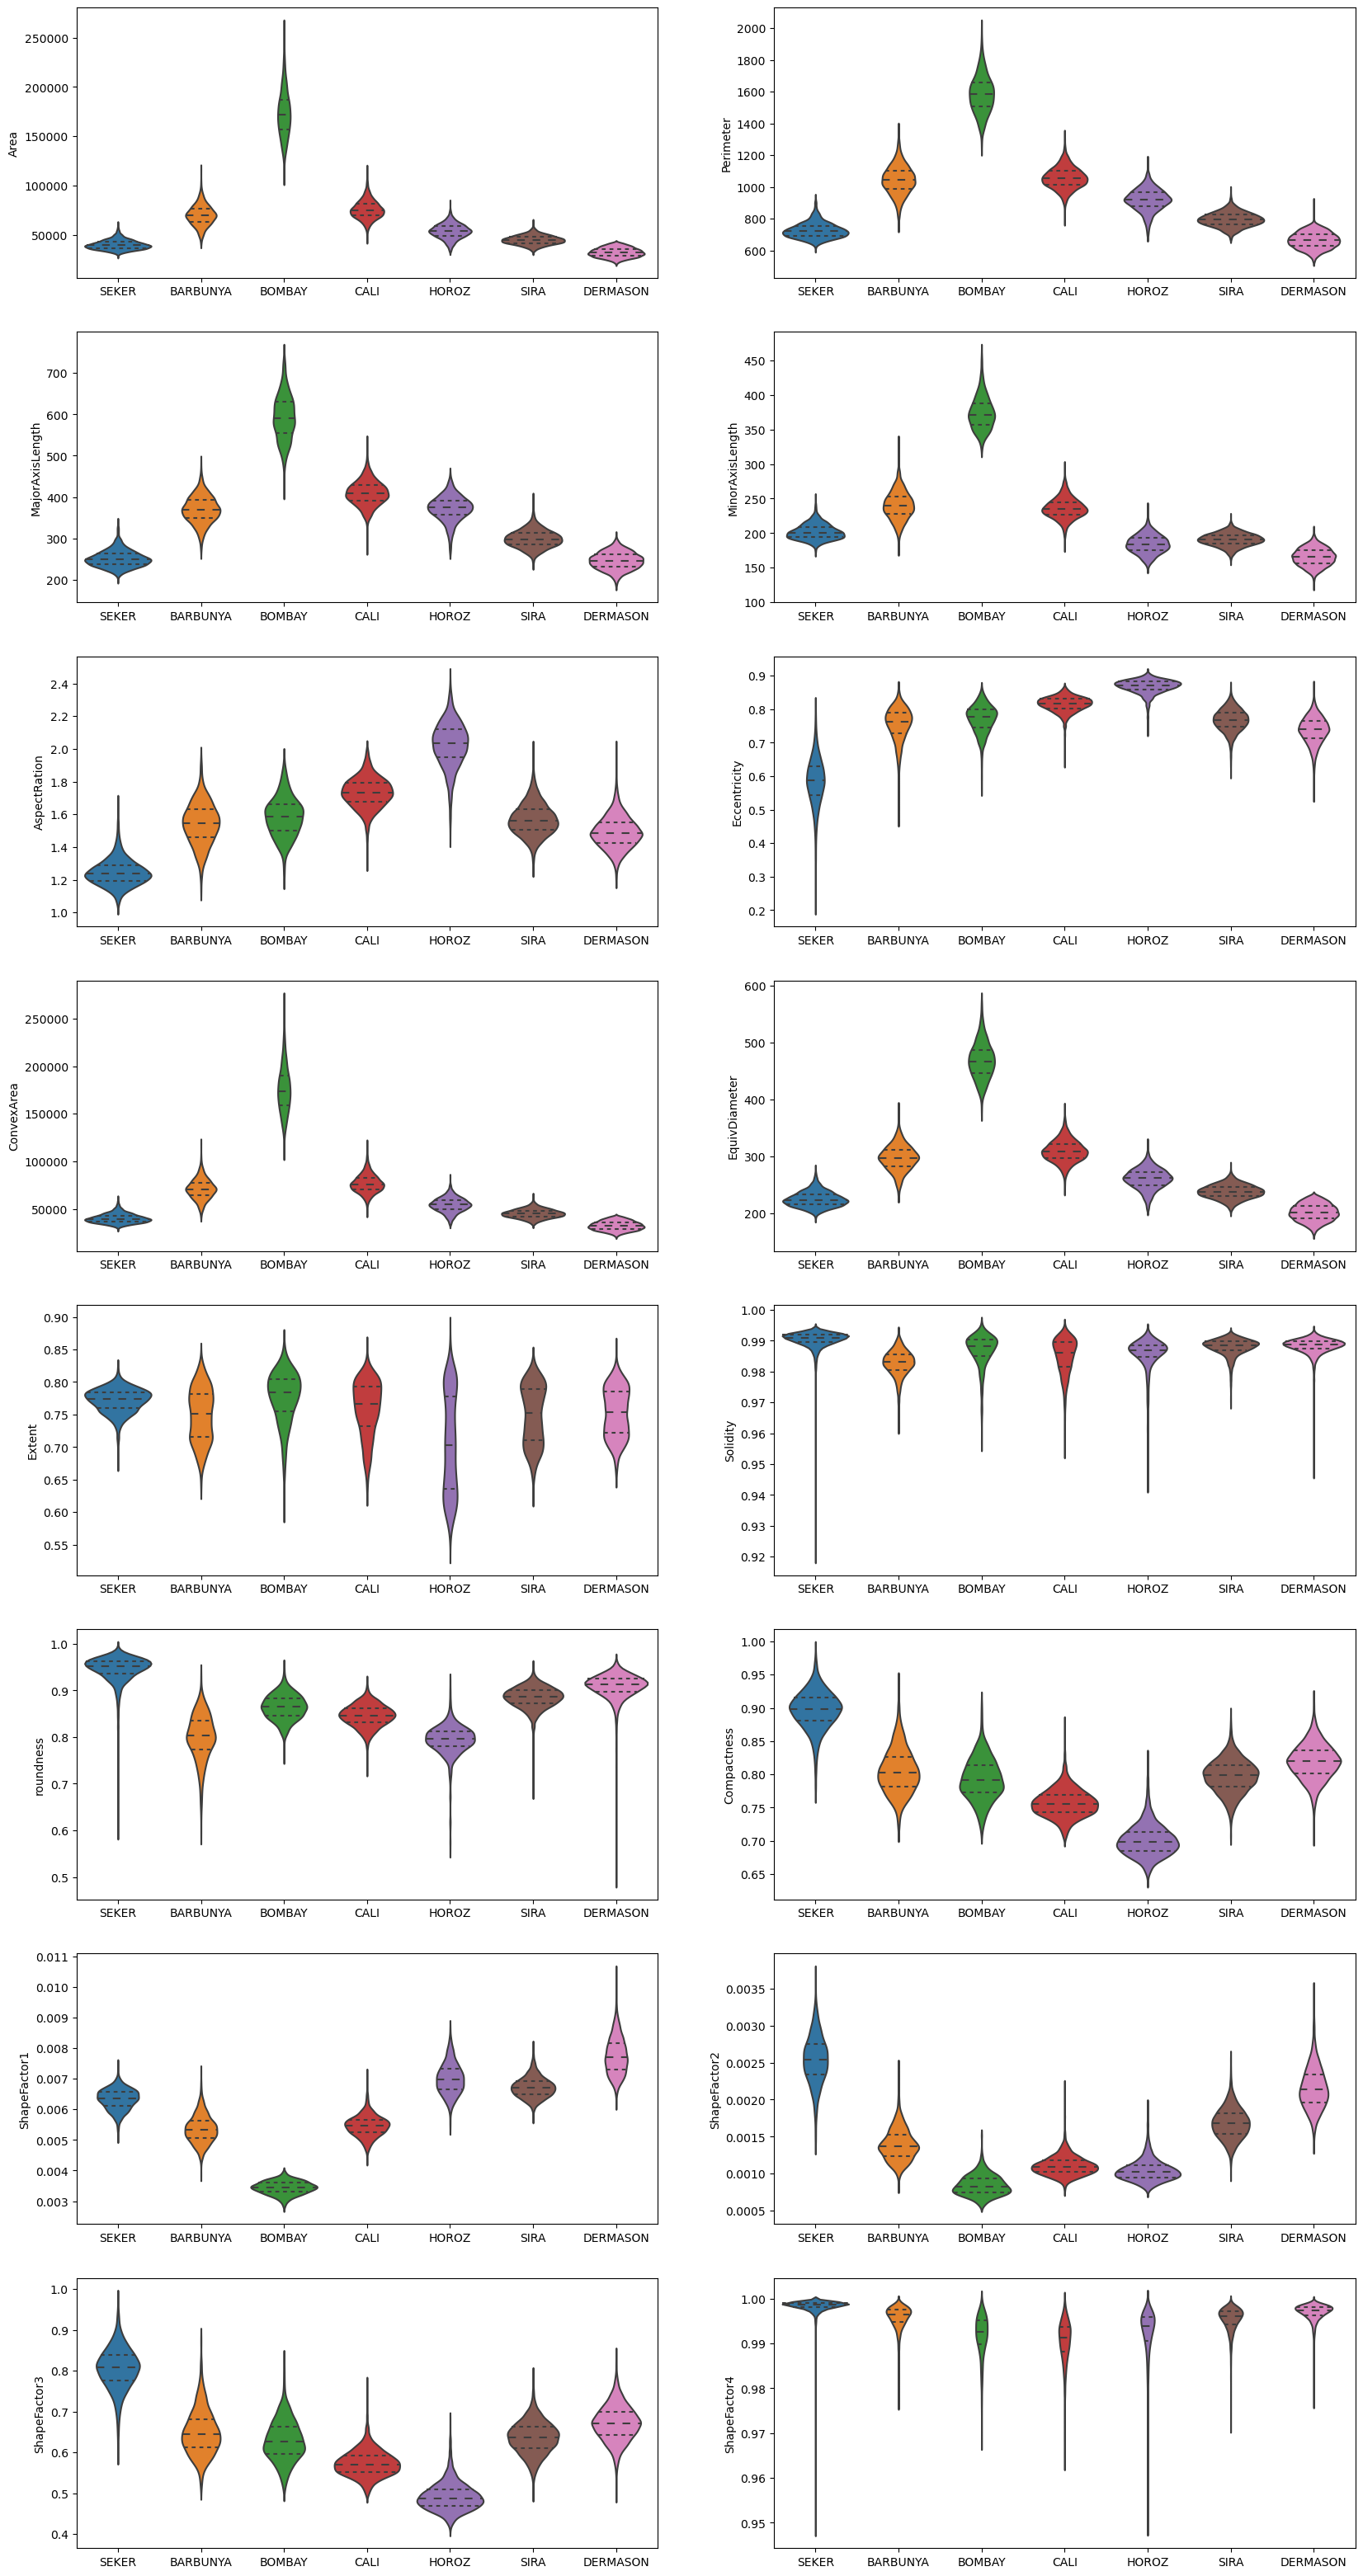

In [19]:
fig, axes = plt.subplots (8, 2, figsize = (20, 40) ) 
for feature, ax in zip (df1.columns.drop("Class"), axes.flatten( )):
    sns.violinplot (data=df1,x='Class',y=feature,inner='quartile',ax=ax)
    ax.set(xlabel=None)
plt.show()
        
 

 





## Observations

when we observe physical apperence ,BOMBAY beans distinguish in all of 7 because of its 
AREA,SIZE,PERIMETER 
 
SEKER& SIRA & DERMASON show simalirity 

We can see lots of simalirity in 'Bartbunya' & 'Cali' 

## Checking Outliar

Area


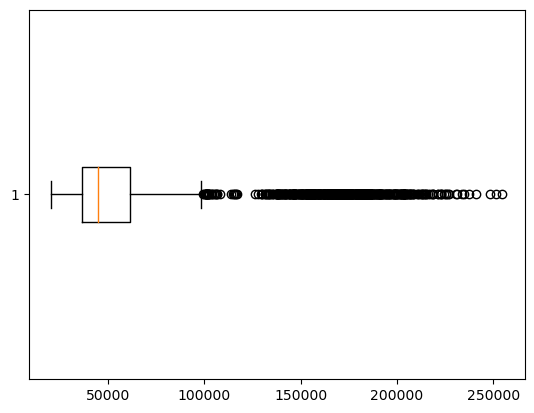

Perimeter


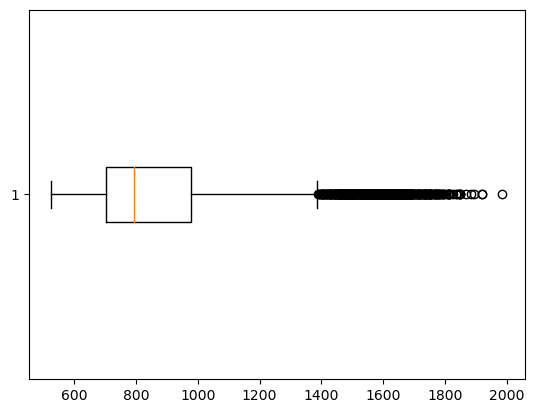

MajorAxisLength


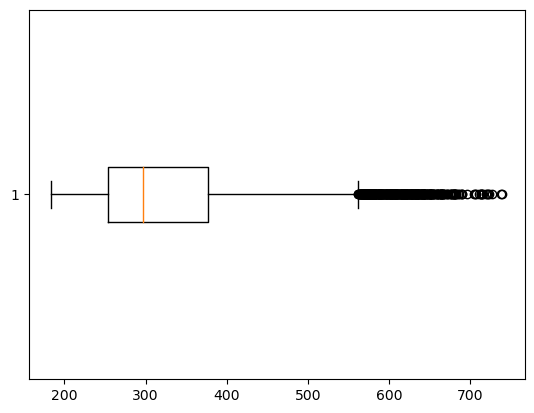

MinorAxisLength


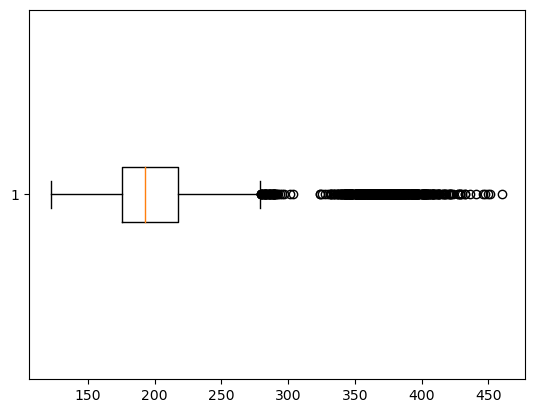

AspectRation


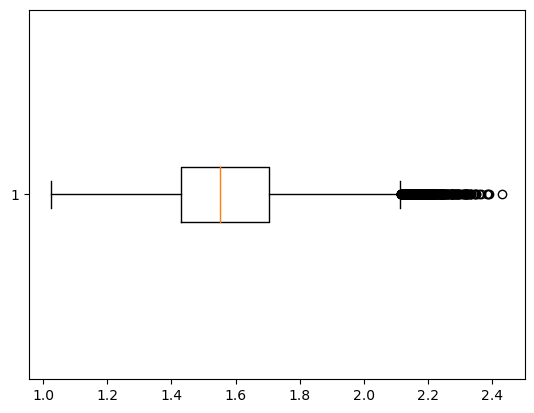

Eccentricity


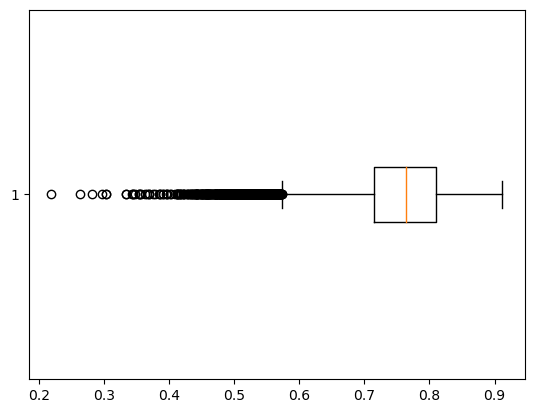

ConvexArea


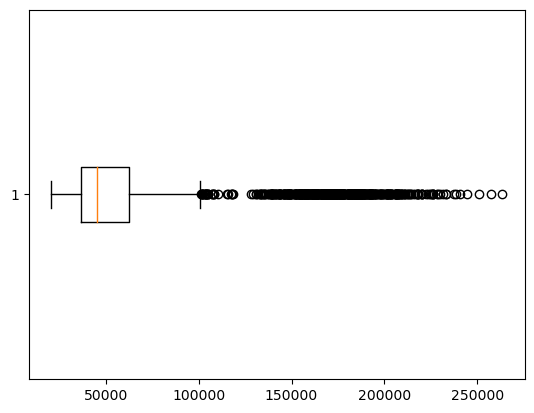

EquivDiameter


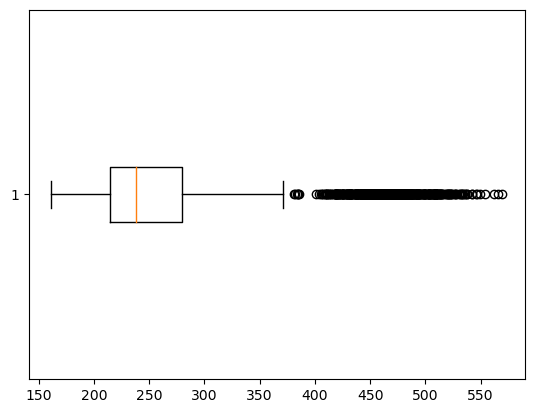

Extent


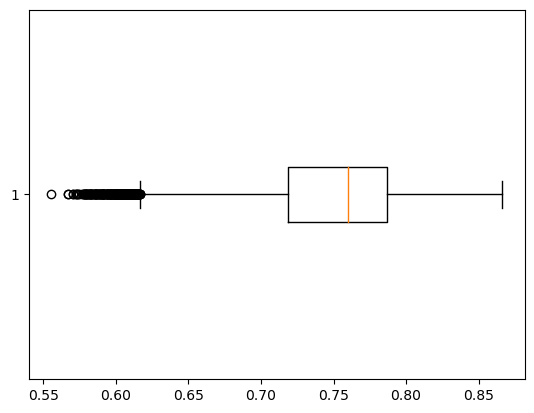

Solidity


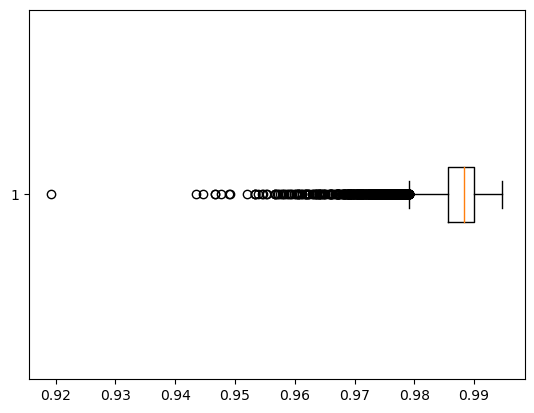

roundness


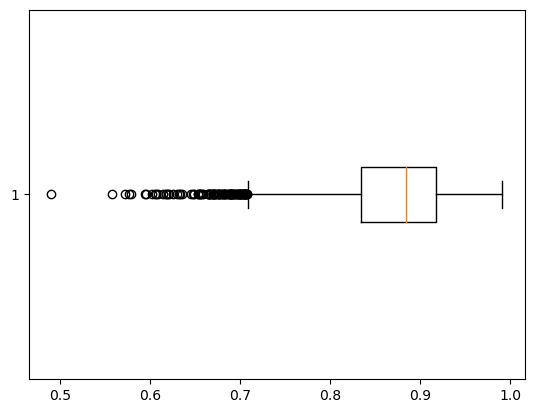

Compactness


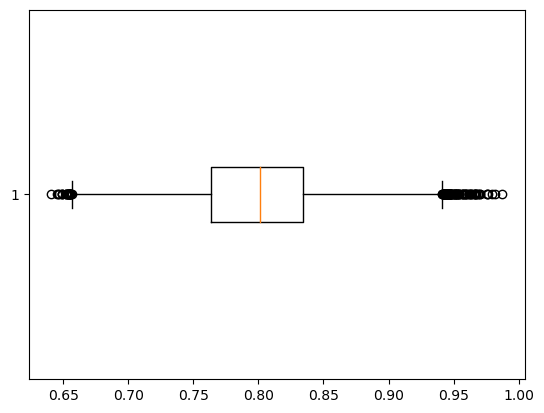

ShapeFactor1


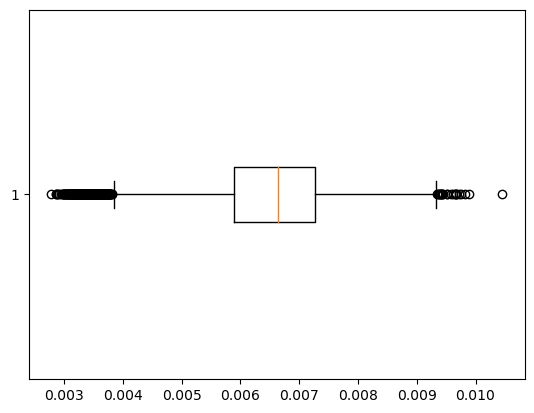

ShapeFactor2


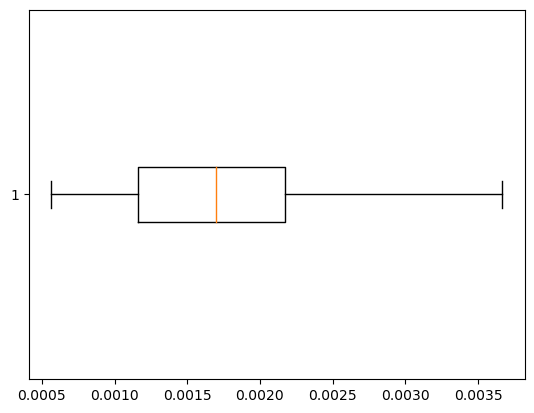

ShapeFactor3


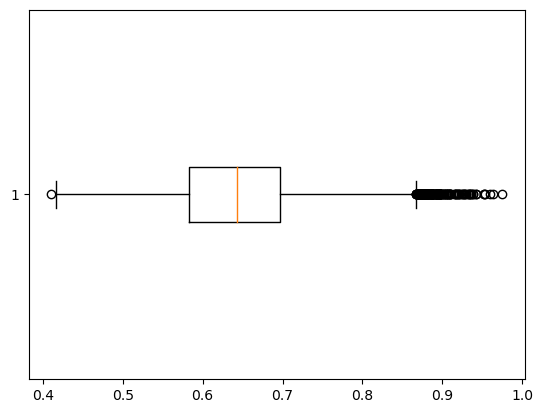

ShapeFactor4


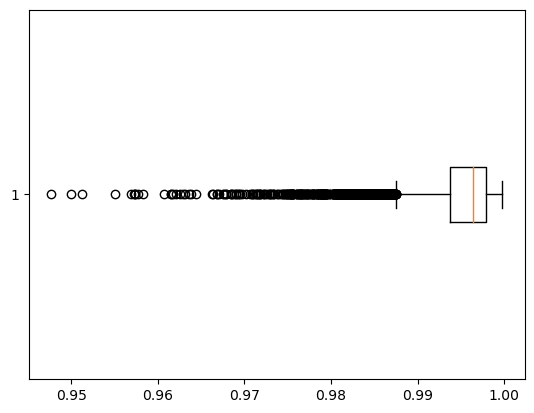

Class


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

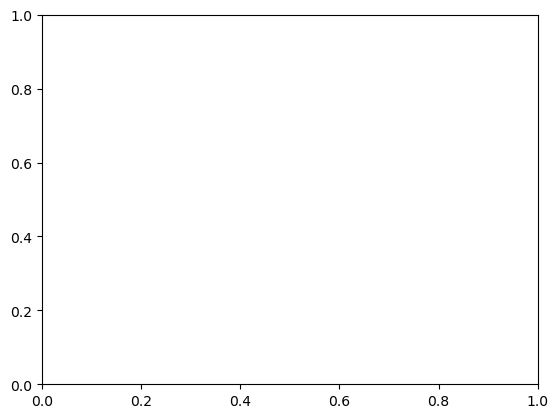

In [20]:
for i in df1:
    print (i)
    plt.boxplot (x=df1[i], vert=False)
    plt.show()


    

## observations

Almost every feature has outliar 

Skewness of data also can be seen 

in this condition we can consider them as real data

<AxesSubplot:xlabel='Class', ylabel='Area'>

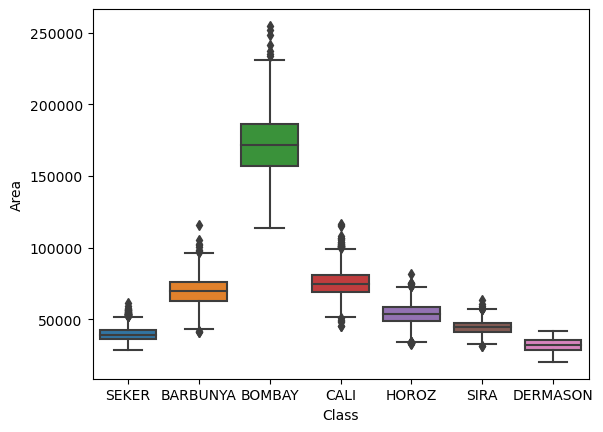

In [21]:
 sns.boxplot (x="Class", y="Area", data=df1) 

Above Graph says 

If we physically see Bombay Bean has maximum are beans it is the biggest of them

<AxesSubplot:>

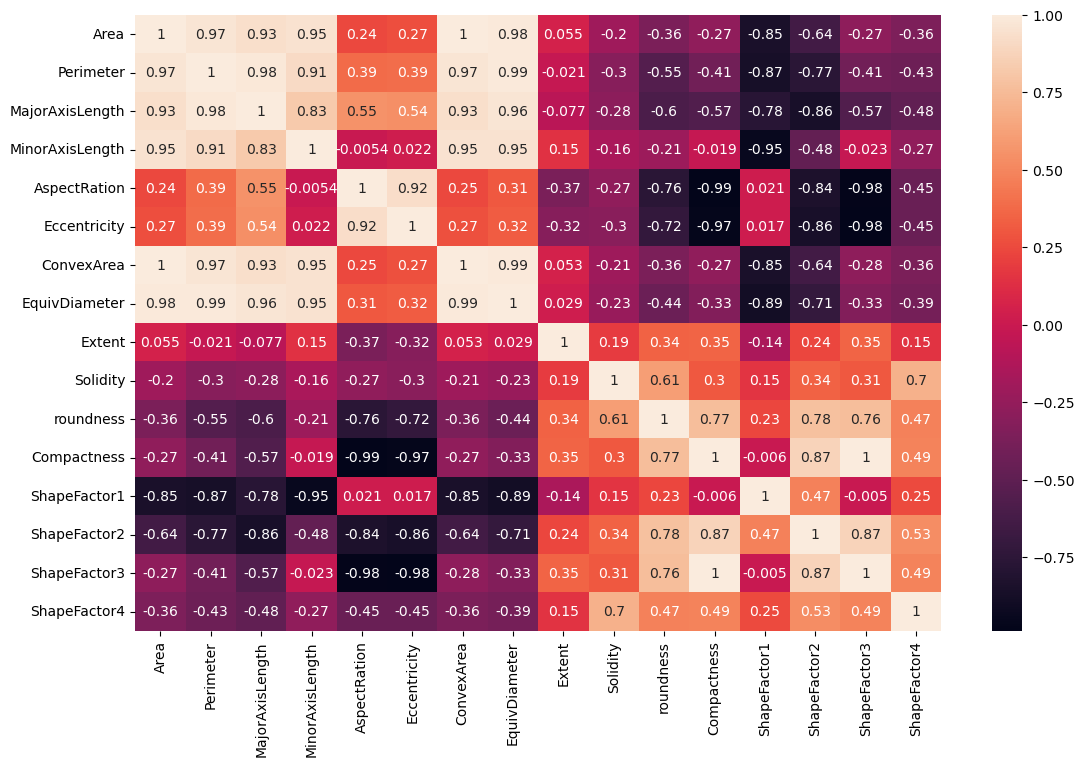

In [22]:
plt.figure (figsize= (13, 8)) 
sns.heatmap (df1. corr(), annot=True)

## Observations

Above Heatmap shows there are lot of correlations between many features 

We need to Drop below features

#convexarea

#solidity # coz problem state needs to classify according to physical visual

#equidiameter 

#comapctness 

#minor axis length 


In [23]:
 df1 # previous dataframe

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## 4. Data Cleaning

In [24]:
 #dropping duplicates also comes in data cleaning part 


### Dropping HIGHLY CORRELATED FEATURES  

In [25]:
df2=df1. drop(columns=[ "MinorAxisLength", "Solidity" , "EquivDiameter", "Compactness",'ConvexArea'])
df2

,Area,Perimeter,MajorAxisLength,AspectRation,Eccentricity,Extent,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,1.197191,0.549812,0.763923,0.958027,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,1.097356,0.411785,0.783968,0.887034,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,1.209713,0.562727,0.778113,0.947849,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,1.153638,0.498616,0.782681,0.903936,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,1.060798,0.333680,0.773098,0.984877,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,1.552728,0.765002,0.714574,0.916603,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,1.476439,0.735702,0.799943,0.922015,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,1.472582,0.734065,0.729932,0.918424,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,1.489326,0.741055,0.705389,0.907906,0.006724,0.001852,0.668237,0.995222,DERMASON


<AxesSubplot:>

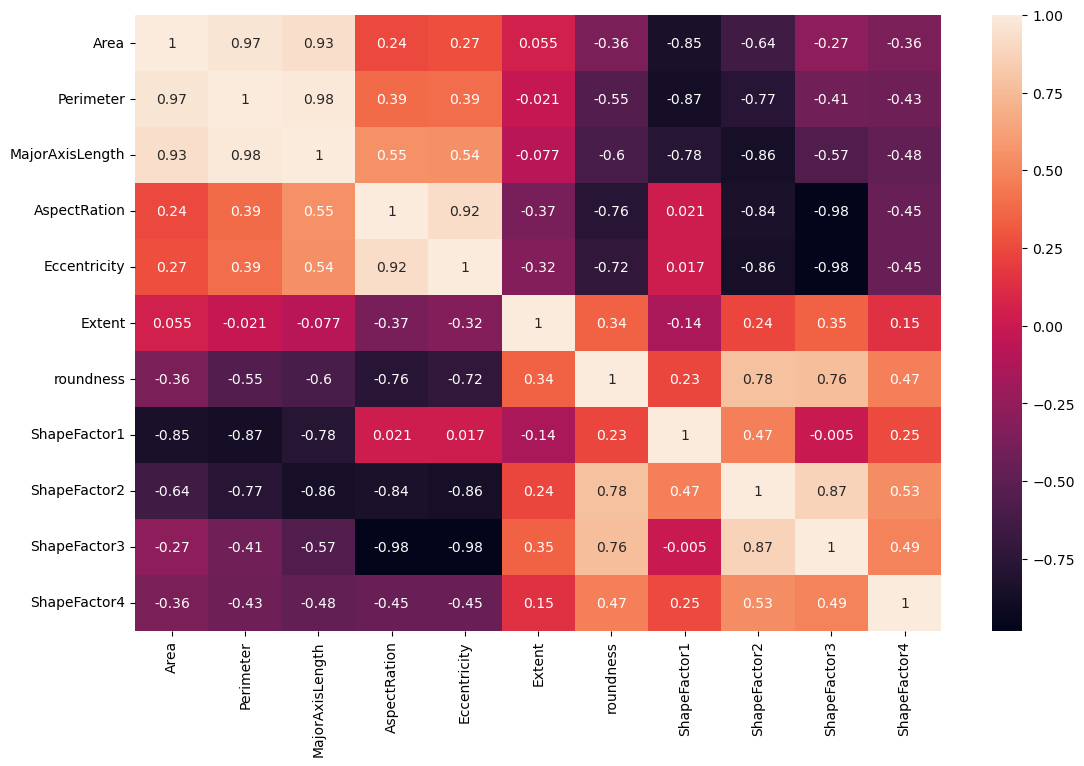

In [26]:
plt.figure (figsize=(13, 8)) 
 
sns.heatmap(df2. corr(), annot=True) 

### There are still few high correlation but we need them 


In [27]:
from sklearn .model_selection import train_test_split
from sklearn. metrics import accuracy_score


In [28]:
df2.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

There is high imbalance in target Class

## Encoding target(Class)


In [29]:
 #one hot encoding works better with Random forest 

In [30]:
df2=pd.get_dummies (df2, columns=["Class"] )# one hot encoding works better with Random forest
df2

,Area,Perimeter,MajorAxisLength,AspectRation,Eccentricity,Extent,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,1.197191,0.549812,0.763923,0.958027,0.007332,0.003147,0.834222,0.998724,0,0,0,0,0,1,0
1,28734,638.018,200.524796,1.097356,0.411785,0.783968,0.887034,0.006979,0.003564,0.909851,0.998430,0,0,0,0,0,1,0
2,29380,624.110,212.826130,1.209713,0.562727,0.778113,0.947849,0.007244,0.003048,0.825871,0.999066,0,0,0,0,0,1,0
3,30008,645.884,210.557999,1.153638,0.498616,0.782681,0.903936,0.007017,0.003215,0.861794,0.994199,0,0,0,0,0,1,0
4,30140,620.134,201.847882,1.060798,0.333680,0.773098,0.984877,0.006697,0.003665,0.941900,0.999166,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,1.552728,0.765002,0.714574,0.916603,0.006858,0.001749,0.642988,0.998385,0,0,0,1,0,0,0
13607,42101,757.499,281.576392,1.476439,0.735702,0.799943,0.922015,0.006688,0.001886,0.676099,0.998219,0,0,0,1,0,0,0
13608,42139,759.321,281.539928,1.472582,0.734065,0.729932,0.918424,0.006681,0.001888,0.676884,0.996767,0,0,0,1,0,0,0
13609,42147,763.779,283.382636,1.489326,0.741055,0.705389,0.907906,0.006724,0.001852,0.668237,0.995222,0,0,0,1,0,0,0


## Splitting Features & Target 

In [31]:
x=df2.iloc[: , :-7]
y=df2.iloc[:,-7:]

In [32]:
x.shape

(13543, 11)

In [33]:
x

,Area,Perimeter,MajorAxisLength,AspectRation,Eccentricity,Extent,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,1.197191,0.549812,0.763923,0.958027,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,1.097356,0.411785,0.783968,0.887034,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,1.209713,0.562727,0.778113,0.947849,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,1.153638,0.498616,0.782681,0.903936,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,1.060798,0.333680,0.773098,0.984877,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,1.552728,0.765002,0.714574,0.916603,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,1.476439,0.735702,0.799943,0.922015,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,1.472582,0.734065,0.729932,0.918424,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,1.489326,0.741055,0.705389,0.907906,0.006724,0.001852,0.668237,0.995222


In [34]:
y

,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
13606,0,0,0,1,0,0,0
13607,0,0,0,1,0,0,0
13608,0,0,0,1,0,0,0
13609,0,0,0,1,0,0,0


## 5. Building model

### Random forest 

i've tried SVM & with SVM with HYPER PARAMETER _TUNING,DecisionTree but best results are 
given by Random_Forest

so i'll be submitting only random forest 

In [35]:
# important package for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Splitting Training and testing data set

In [36]:
x_train, x_test,y_train,y_test=train_test_split (x, y, test_size=0.3, random_state=23) 
#keeping training size 70% 

#testing size 30%

In [37]:
print ("x_train_shape", x_train.shape)
print("x_test_shape",x_test.shape) 
print("y_train_shape",y_train.shape)
print ("y_test_shape",y_test.shape) 

x_train_shape (9480, 11)
x_test_shape (4063, 11)
y_train_shape (9480, 7)
y_test_shape (4063, 7)


Model

In [38]:
# initializing the model
rfc= RandomForestClassifier(random_state=23)
# fitting data
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=23)

Prediction 

In [39]:
y_pred_rfc=rfc.predict(x_test)
y_pred_rfc

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Checking model score on TEST data set

In [40]:
print(rfc.score(x_test,y_test))

0.9123800147674133


Checking model score on TRAINING data set

In [41]:
print(rfc.score(x_train,y_train))

0.9998945147679325


Checking model score on PREDICTED data

In [42]:
print(rfc.score(x_test,y_pred_rfc))

1.0


Comparing Actual and Predicted score


In [43]:
# checking score with metrics
from sklearn.metrics import accuracy_score
score_rfc=accuracy_score(y_test, y_pred_rfc)
print('comparision score between actual and predicted labels',score_rfc)

comparision score between actual and predicted labels 0.9123800147674133


## The accuracy is 0.91, meaning that the model correctly predicted 91% of the instances.

In [44]:
from sklearn import metrics 
from sklearn . metrics import classification_report, roc_auc_score, accuracy_score

## Roc & Auc Score 

In [45]:
print("Roc Auc Score:", roc_auc_score(y_test,y_pred_rfc) ) 

Roc Auc Score: 0.954245481690673


Confusion matrix

In [46]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test.values.argmax(axis=1), y_pred_rfc.argmax(axis=1))
confusion_matrix


array([[347,   1,  35,   0,   3,   1,   7],
       [  1, 145,   0,   0,   0,   0,   0],
       [ 20,   0, 438,   0,  10,   1,   1],
       [ 13,   0,   0, 978,   1,  15,  55],
       [ 10,   0,   5,   3, 508,   0,  11],
       [ 17,   0,   0,  17,   0, 604,  11],
       [ 27,   0,   0,  66,  12,   4, 696]], dtype=int64)

doing manual calulation for checking accuracy score

In [47]:
cfm = (347 + 145 + 438 + 978 + 508 + 604 + 696) / (347 + 145 + 438 + 978 + 508 + 604 + 696 + 1 + 35 + 3 + 1 + 7 + 1 + 20 + 1)
print("Manual confusion matrix score checking:", cfm)


Manual confusion matrix score checking: 0.9817701453104359


above score and test data score is near about same so we can say model is working good


## 6) CHOOSE BEST  MODEL

I've tried SVM & SVM with hyperparameter tuning using GridSearchCV Also tried Randomforest 
 
after observing all the model ,i come to conclusion that RandomForest  
gives good result.  


So my final selection would be RandomForest 